In [ ]:
!pip install --upgrade pandas --user

In [420]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
path = 'C:/Users/Vladimir/Downloads/Bioinf_school/data'

In [416]:
bacterias = pd.read_csv('C:/Users/Vladimir/Downloads/Bioinf_school/data/bacterias.csv').dropna(subset=['bact', 'ID'])
bacterias.reset_index(drop=True, inplace=True)
bacterias


,group,bact,gen,prot,ID
0,H+,Bacteroidales bacterium ph8,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...,NaN,UP000490506
1,H+,Bifidobacterium adolescentis,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...,NaN,UP000008702
2,H+,Bifidobacterium angulatum,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...,NaN,UP000006408
3,H+,Bifidobacterium catenulatum,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...,NaN,UP000411400
4,H+,Lachnospiraceae bacterium 8_1_57FAA,NaN,NaN,UP000003339
...,...,...,...,...,...
57,H=,Bacteroides cellulosilyticus,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...,NaN,UP000018191
58,H=,Bacteroides caccae,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...,NaN,UP000095657
59,H=,Bacteroides stercoris,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/9...,NaN,UP000056419
60,H=,Prevotella copri,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/0...,NaN,UP000466386


In [279]:
# functions
def parse_prot(token):
    file = 'C:/Users/Vladimir/Downloads/Bioinf_school/data/' + token + '.fasta.tsv'
    df_raw = pd.read_csv(file, sep='\t')
    df_raw.columns = ['Protein accession', 
    'Sequence MD5 digest', 
    'Sequence length',
    'Analysis',
    'Signature accession' ,
    'Signature description' ,
    'Start location',
    'Stop location',
    'Score' ,
    'Status' ,
    'Date' ,
    'InterPro annotations' ,
    'InterPro annotations' ]
    df = df_raw[['Sequence MD5 digest', 'Analysis', 'Signature accession', 'Signature description']]
    df = df[df["Signature description"]!= '-']
    df = df[df['Analysis'] == 'Pfam']
    vc2 = df['Signature description'].value_counts()
    return vc2

def append_value(dict_obj, key, value):
    # Check if key exist in dict or not
    if key in dict_obj:
        # Key exist in dict.
        # Check if type of value of key is list or not
        if not isinstance(dict_obj[key], list):
            # If type is not list then make it list
            dict_obj[key] = [dict_obj[key]]
        # Append the value in list
        dict_obj[key].append(value)
    else:
        # As key is not in dict,
        # so, add key-value pair
        dict_obj[key] = value
        
def merge_dicts(d1, d2):
    if len(d1) != 0 :
        for key, item in d1.items():
            if key in d2.keys():  
                append_value(d1, key, d2[key])
            else:
                append_value(d1, key, 0)            
        return d1
    else:
        return d2

In [414]:
prot_pos_tmp = {}
prot_neg_tmp = {}
prot_pos = {}
prot_neg = {}

In [424]:
# The list of items
files = os.listdir(path)
 
# Loop to print each filename separately
p = 0
n = 0
#prot_pos = {}
#prot_neg = {}
for filename in files:
    tmp = filename.split('.')[0]
    ext = filename.split('.')[1]
    if ext == 'fasta':
        group = bacterias.loc[bacterias['ID'] == tmp][['group', 'bact']].reset_index().loc[0, 'group']
        if group == 'H-':
            n += 1
            prot_neg_tmp = parse_prot(tmp).to_dict()
            prot_neg = merge_dicts(prot_neg, prot_neg_tmp)
        else:
            p += 1
            prot_pos_tmp = parse_prot(tmp).to_dict()
            prot_pos = merge_dicts(prot_pos, prot_pos_tmp)
print('h-', n)
print('h+=', p)

prot_pos_tmp = {}
prot_neg_tmp = {}


h- 33
h+= 16


In [298]:
pd.Series(prot_pos) # to check correctness

ABC transporter                                            [78, 65, 57, 66, 52, 52, 75, 75, 38, 38, 55, 5...
FIVAR domain                                               [39, 0, 0, 0, 0, 0, 4, 4, 0, 0, 2, 2, 0, 0, 0,...
Helix-turn-helix                                           [37, 22, 0, 4, 16, 16, 6, 6, 7, 7, 11, 11, 4, ...
F5/8 type C domain                                         [33, 23, 0, 0, 0, 0, 0, 0, 14, 14, 0, 0, 15, 1...
MatE                                                       [28, 24, 4, 6, 33, 33, 42, 42, 23, 23, 31, 31,...
                                                                                 ...                        
DNA polymerase III beta subunit, central domain            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, ...
FAD binding domain in molybdopterin dehydrogenase          [1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, ...
Cobalamin synthesis G C-terminus                           [1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, ...
Phage tail protein 

In [315]:
for key, value in prot_neg.items():
    prot_neg[key] = np.median(value)

for key, value in prot_pos.items():
    prot_pos[key] = np.median(value)


In [316]:

res = merge_dicts(prot_neg, prot_pos)
res

{'ABC transporter': [94.0, 45.0],
 'LysR substrate binding domain': [6.0, 2.0],
 'Bacterial regulatory helix-turn-helix protein, lysR family': [7.0, 2.0],
 'Major Facilitator Superfamily': [7.0, 0],
 'Binding-protein-dependent transport system inner membrane component': [31.0,
  4.0],
 'Helix-turn-helix domain': [31.0, 25.0],
 'Response regulator receiver domain': [35.0, 35.0],
 'Histidine kinase-, DNA gyrase B-, and HSP90-like ATPase': [30.0, 28.0],
 'EamA-like transporter family': [8.0, 0],
 'Bacterial regulatory proteins, lacI family': [5.0, 4.0],
 'Branched-chain amino acid transport system / permease component': [8.0, 0.0],
 'Acetyltransferase (GNAT) domain': [12.0, 7.0],
 'Bacterial regulatory proteins, gntR family': [10.0, 3.0],
 'Bacterial extracellular solute-binding proteins, family 3': [5.0, 2.0],
 'Acetyltransferase (GNAT) family': [9.0, 5.0],
 'Enoyl-(Acyl carrier protein) reductase': [5.0, 5.0],
 'Aminotransferase class I and II': [10.0, 12.0],
 'Aldehyde dehydrogenase fa

In [330]:
#columns = ['m-', 'm+']
fin = []
fin = pd.DataFrame(res).transpose()
#fin.columns = columns
fin = fin.loc[(fin[0]>0) & (fin[1]>0)]
fin.reset_index(level=0, inplace=True)
fin.columns =  ['process', 'm-', 'm+']
fin['fold change m-'] = fin['m-']/(fin['m+'] + 1 )
fin['fold change m+'] = fin['m+']/(fin['m-'] + 1 )
fin = fin.sort_values('fold change m-', ascending = False)
fin

,process,m-,m+,fold change m-,fold change m+
3,Binding-protein-dependent transport system inn...,31.0,4.0,6.200000,0.125000
22,Bacterial extracellular solute-binding protein,8.0,1.0,4.000000,0.111111
39,Helix-turn-helix,20.0,6.0,2.857143,0.285714
100,ABC transporter transmembrane region,14.0,4.0,2.800000,0.266667
53,HAMP domain,8.0,2.0,2.666667,0.222222
...,...,...,...,...,...
387,Glycosyl hydrolases family 2,2.0,8.0,0.222222,2.666667
110,Sulfatase,2.0,9.0,0.200000,3.000000
21,Tetratricopeptide repeat,6.0,32.0,0.181818,4.571429
250,Peptidase M16 inactive domain,1.0,5.0,0.166667,2.500000


In [334]:
fin.head(10)['process'].to_list()

['Binding-protein-dependent transport system inner membrane component',
 'Bacterial extracellular solute-binding protein',
 'Helix-turn-helix',
 'ABC transporter transmembrane region',
 'HAMP domain',
 'Transcriptional regulatory protein, C terminal',
 'HTH domain',
 'Bacterial regulatory proteins, gntR family',
 'Bacterial regulatory helix-turn-helix protein, lysR family',
 'MarR family']

In [335]:
fin.tail(10)['process'].to_list()

['Endonuclease/Exonuclease/phosphatase family',
 'Insulinase (Peptidase family M16)',
 'Carbon-nitrogen hydrolase',
 'Thioesterase superfamily',
 'Glycosyl hydrolases family 2, sugar binding domain',
 'Glycosyl hydrolases family 2',
 'Sulfatase',
 'Tetratricopeptide repeat',
 'Peptidase M16 inactive domain',
 'Peptidase family S41']

In [340]:
bad = fin[['process','fold change m-']].head(10)
good = fin[['process','fold change m-']].tail(10)

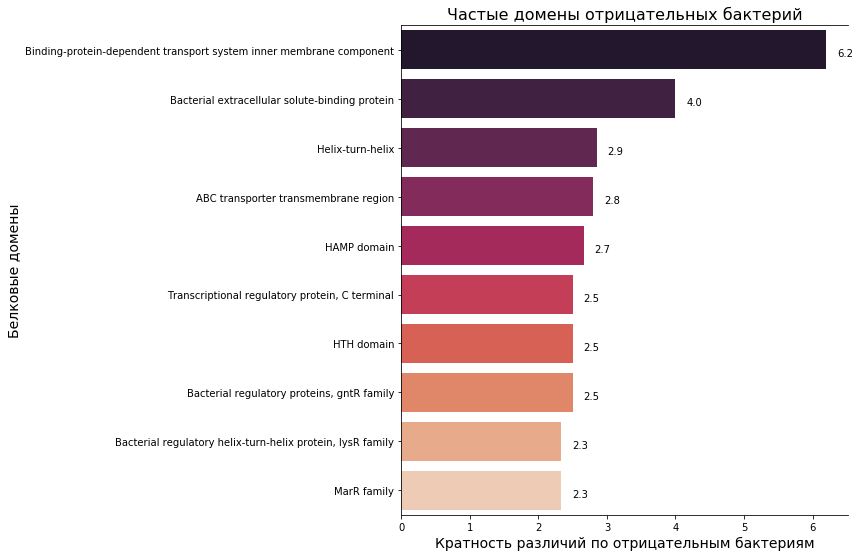

In [399]:
plt.figure(figsize=(8, 9))
ax = sns.barplot(y="process", x="fold change m-", data=bad, palette = "rocket", orient = 'h')
ax.spines['right'].set_visible(False)
# Annotate every single Bar with its value, based on it's width           
for p in ax.patches:
    width = p.get_width()
    plt.text(0.27+p.get_width(), p.get_y()+0.59*p.get_height(),
             '{:1.1f}'.format(width),
             ha='center', va='center')
# Setting the label for x-axis
plt.xlabel("Кратность различий по отрицательным бактериям", size=14)
  
# Setting the label for y-axis
plt.ylabel("Белковые домены", size=14)
  
# Setting the title for the graph
plt.title("Частые домены отрицательных бактерий", size=16)
#plt.xticks(fontsize=13, fontfamily='arial')
#plt.yticks(fontsize=13, fontfamily='arial')
# Fianlly showing the plot
plt.show()

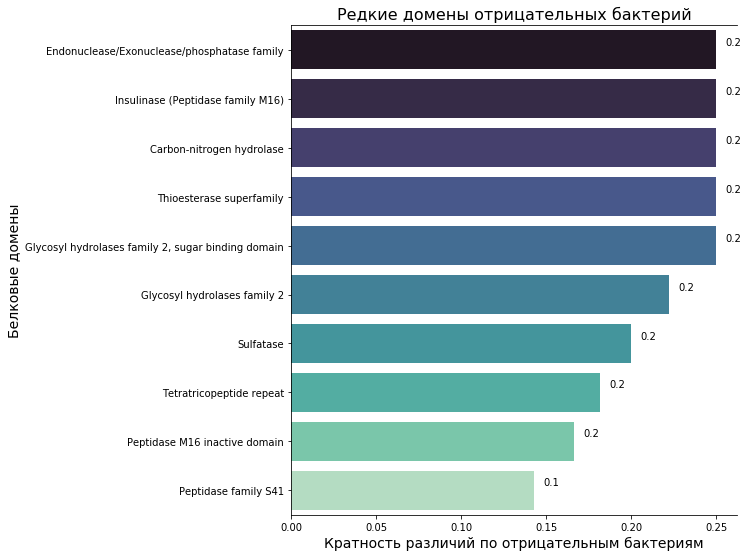

In [400]:
plt.figure(figsize=(8, 9))
ax = sns.barplot(y="process", x="fold change m-", data=good, palette = "mako", orient = 'h')
ax.spines['right'].set_visible(False)
# Annotate every single Bar with its value, based on it's width           
for p in ax.patches:
    width = p.get_width()
    plt.text(0.01+p.get_width(), p.get_y()+0.3*p.get_height(),
             '{:1.1f}'.format(width),
             ha='center', va='center')
# Setting the label for x-axis
plt.xlabel("Кратность различий по отрицательным бактериям", size=14)
  
# Setting the label for y-axis
plt.ylabel("Белковые домены", size=14)
  
# Setting the title for the graph
plt.title("Редкие домены отрицательных бактерий", size=16)
#plt.xticks(fontsize=13, fontfamily='arial')
#plt.yticks(fontsize=13, fontfamily='arial')
# Fianlly showing the plot
plt.show()